<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/sessions_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%%capture
# For Google Colab:
!pip install kats
!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv
#!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK_norm.csv

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from imp import reload
from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
reload(logging)


<module 'logging' from '/usr/lib/python3.7/logging/__init__.py'>

In [66]:
uk = pd.read_csv("UK_norm.csv", sep=';', decimal=',')
uk = uk.rename(columns={'date':'time'})       # ts implica 'time'
print(uk.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      40 non-null     object 
 1   year      40 non-null     int64  
 2   month     40 non-null     int64  
 3   sessions  40 non-null     float64
 4   searches  40 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB
None


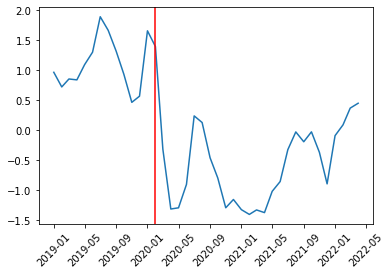

In [67]:
# import packages
from kats.detectors.cusum_detection import CUSUMDetector

tsd = TimeSeriesData(uk.loc[:,['time','sessions']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()


In [68]:
print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999999305713, direction: decrease, index: 13, delta: -1.7194978736263735, regression_detected: True, stable_changepoint: True, mu0: 1.1176736428571428, mu1: -0.6018242307692308, llr: 46.7814410014017, llr_int: inf, p_value: 6.942868502335386e-11, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999999305713
direction = decrease
cp_index = 13
mu0 = 1.1176736428571428
mu1 = -0.6018242307692308
delta = -1.7194978736263735
llr_int = inf
llr = 46.7814410014017
regression_detected = True
stable_changepoint = True
p_value = 6.942868502335386e-11
p_value_int = nan


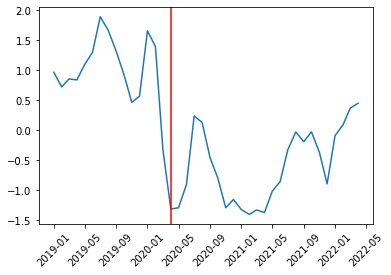

In [69]:
# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(uk.loc[:,['time','sessions']])
detector = RobustStatDetector(tsd)
change_points = detector.detector()

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [70]:
change_point = change_points[0]
change_point

TimeSeriesChangePoint(start_time: 2020-04-01T00:00:00.000000000, end_time: 2020-04-01T00:00:00.000000000, confidence: 0.9925085319853847)

In [71]:
print('metric','=',change_point.metric)
print('index','=',change_point.index)
uk['time'].iloc[change_point.index]

metric = 0.8866766
index = 15


'2020-04'

In [77]:
from kats.utils.simulator import Simulator
from kats.tsfeatures.tsfeatures import TsFeatures
model = TsFeatures()
output_features = model.transform(tsd)
output_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'binarize_mean': 0.475,
 'crossing_points': 6,
 'diff1y_acf1': 0.3034129476649195,
 'diff1y_acf5': 0.450924369314712,
 'diff1y_pacf5': 0.48026110131619787,
 'diff2y_acf1': -0.08690072327037389,
 'diff2y_acf5': 0.23121435778257207,
 'diff2y_pacf5': 0.7345324575906149,
 'entropy': 0.3850959014739434,
 'firstmin_ac': 4,
 'firstzero_ac': 10,
 'flat_spots': 1,
 'heterogeneity': 12.345110327769508,
 'histogram_mode': -1.412027,
 'holt_alpha': 0.9999999850988388,
 'holt_beta': 0.0,
 'hurst': -0.023961607810251563,
 'hw_alpha': nan,
 'hw_beta': nan,
 'hw_gamma': nan,
 'length': 40,
 'level_shift_idx': 6,
 'level_shift_size': 0.16149705000000014,
 'linearity': 0.30957191531041967,
 'lumpiness': 0.0035723833985835157,
 'mean': 2.499999990079882e-08,
 'peak': 6,
 'seas_acf1': 0.3554505855160967,
 'seas_pacf1': -0.32964553548729325,
 'seasonality_strength': 0.5492750101133497,
 'spikiness': 1.543073922160958e-05,
 'stability': 0.7050005956070909,
 'std1st_der': 0.410761075877449,
 'trend_strength